## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 18s 0us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
#glob determines no of folders = no of output nodes
folders = glob('Datasets/train/*')

In [15]:
# our layers - you can add more if you want
#flattening the layer
#flatten is required before u connect to a fully connected layer
x = Flatten()(resnet.output)

In [11]:
#use dense model to set length of output folder
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
#data augmentation is done
#we shouldnt do data augmentation in test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 8s 4s/step - loss: 5.5936 - accuracy: 0.3281 - val_loss: 12.4379 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 6s 3s/step - loss: 14.2980 - accuracy: 0.2969 - val_loss: 4.7245 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 7s 3s/step - loss: 4.9783 - accuracy: 0.3594 - val_loss: 7.3020 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 7s 4s/step - loss: 6.1198 - accuracy: 0.4219 - val_loss: 11.2462 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 7s 4s/step - loss: 6.5301 - accuracy: 0.4844 - val_loss: 8.9314 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 7s 3s/step - loss: 4.9616 - accuracy: 0.4219 - val_loss: 2.9476 - val_accuracy: 0.2241
Epoch 7/50
2/2 [==============================] - 7s 3s/step - loss: 2.5081 - accuracy: 0.2969 - va

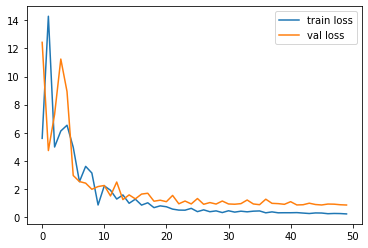

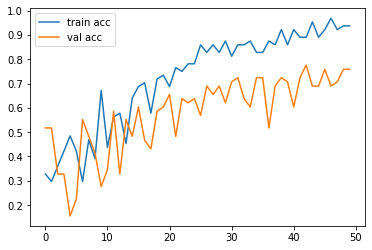

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [26]:

y_pred = model.predict(test_set)


In [27]:
y_pred

array([[1.9237831e-01, 7.7949119e-01, 2.8130528e-02],
       [3.1012053e-02, 3.1702554e-01, 6.5196234e-01],
       [3.7743236e-04, 9.7441125e-01, 2.5211351e-02],
       [2.8220903e-02, 2.4806996e-01, 7.2370911e-01],
       [9.4789988e-01, 3.8184885e-02, 1.3915218e-02],
       [4.0358657e-01, 3.7982139e-01, 2.1659201e-01],
       [1.9395828e-02, 8.1840324e-01, 1.6220085e-01],
       [1.7138662e-02, 5.4200166e-03, 9.7744137e-01],
       [2.2422145e-01, 4.7182220e-01, 3.0395630e-01],
       [8.4366165e-02, 7.2991669e-01, 1.8571712e-01],
       [4.6619888e-02, 6.9868940e-01, 2.5469074e-01],
       [1.9626848e-02, 5.5978006e-01, 4.2059305e-01],
       [6.9544876e-01, 2.4206702e-01, 6.2484201e-02],
       [6.0703275e-03, 4.1664767e-01, 5.7728195e-01],
       [1.4764929e-02, 7.7826011e-01, 2.0697498e-01],
       [5.7236016e-01, 2.7675152e-01, 1.5088823e-01],
       [1.6072819e-02, 9.0364712e-01, 8.0279998e-02],
       [6.8594655e-03, 9.5454115e-01, 3.8599383e-02],
       [6.1710523e-03, 9.579

In [28]:
#selecting highesh probability argmax
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
#output from my test data
y_pred

array([1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0], dtype=int64)

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_resnet50.h5')

In [37]:
img_data

NameError: name 'img_data' is not defined

In [38]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [39]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[1.8655624e-03, 9.3343173e-04, 9.9720097e-01]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
a==1

array([False])